In [8]:
import numpy as np
import pandas as pd
import sys
sys.path.insert(1, sys.path[0].replace('analysis', 'src'))
from knn import KNearestNeighborsClassifier

books = pd.read_csv("../analysis/child_vs_adult.csv")

In [9]:
data = books.values.tolist()

classification = [row[-1] for row in all_data]

values = [row[:4] for row in all_data]

In [18]:
columns = ["num pages", "num unique words", "avg sentence length", "avg word size"]
maxes = []
mins = []
averages = []
stds = []
for column in columns: 
    maxes.append(books[column].max())
    mins.append(books[column].min())
    averages.append(books[column].mean())
    stds.append(books[column].std())

simple_data = [[] for i in range(len(values))]
min_max_data = [[] for i in range(len(values))]
z_score_data = [[] for i in range(len(values))]

#simple_scaling data

for i in range(len(values)): 
    for j in range(len(values[0])):
        simple_data[i].append(values[i][j] / maxes[j])

#min-max scaling data 
for i in range(len(values)): 
    for j in range(len(values[0])):
        min_max = (values[i][j] - mins[j]) / (maxes[j] - mins[j])
        min_max_data[i].append(min_max)

#z_score data
for i in range(len(values)): 
    for j in range(len(values[0])):
        z_score = (values[i][j] - averages[j]) / stds[j]
        z_score_data[i].append(z_score)

In [20]:
leave_out_dict = {}

for k_value in range(1,100,2):
    leave_out_dict[k_value] = 0
    kNN = KNearestNeighborsClassifier(k=k_value)

    for i in range(len(values)):

        current_point_data = values[i]
        current_point_classification = classification[i]
        
        data_values.pop(i)
        classification.pop(i)

        kNN.fit(data_values, classification)
        classified = kNN.classify(current_point_data)
    
        if current_point_classification == classified:
            leave_out_dict[k_value] += 1

        data_values.insert(i, current_point_data)
        classification.insert(i, current_point_classification)


leave_out_accuracy = [leave_out_dict[k] / len(values) for k in range(1,100,2)]

In [12]:
simple_dict = {}

for k_value in range(1,100,2):
    simple_dict[k_value] = 0
    kNN = KNearestNeighborsClassifier(k=k_value)

    for i in range(len(simple_data)):

        current_point_data = simple_data[i]
        current_point_classification = classification[i]
        
        simple_data.pop(i)
        classification.pop(i)

        kNN.fit(simple_data, classification)
        classified = kNN.classify(current_point_data)
    
        if current_point_classification == classified:
            simple_dict[k_value] += 1

        simple_data.insert(i, current_point_data)
        classification.insert(i, current_point_classification)


simple_accuracy = [simple_dict[k] / len(values) for k in range(1,100,2)]

In [14]:
min_max_dict = {}

for k_value in range(1,100,2):
    min_max_dict[k_value] = 0
    kNN = KNearestNeighborsClassifier(k=k_value)

    for i in range(len(data_values)):

        current_point_data = min_max_data[i]
        current_point_classification = classification[i]
        
        min_max_data.pop(i)
        classification.pop(i)

        kNN.fit(min_max_data, classification)
        classified = kNN.classify(current_point_data)
    
        if current_point_classification == classified:
            min_max_dict[k_value] += 1

        min_max_data.insert(i, current_point_data)
        classification.insert(i, current_point_classification)


min_max_accuracy = [min_max_dict[k] / len(values) for k in range(1,100,2)]

In [16]:
z_score_dict = {}

for k_value in range(1,100,2):
    z_score_dict[k_value] = 0
    kNN = KNearestNeighborsClassifier(k=k_value)

    for i in range(len(data_values)):

        current_point_data = z_score_data[i]
        current_point_classification = classification[i]
        
        z_score_data.pop(i)
        classification.pop(i)

        kNN.fit(z_score_data, classification)
        classified = kNN.classify(current_point_data)
    
        if current_point_classification == classified:
            z_score_dict[k_value] += 1

        z_score_data.insert(i, current_point_data)
        classification.insert(i, current_point_classification)


z_score_accuracy = [z_score_dict[k] / len(values) for k in range(1,100,2)]

<AxesSubplot:xlabel='k', ylabel='z_score_accuracy'>

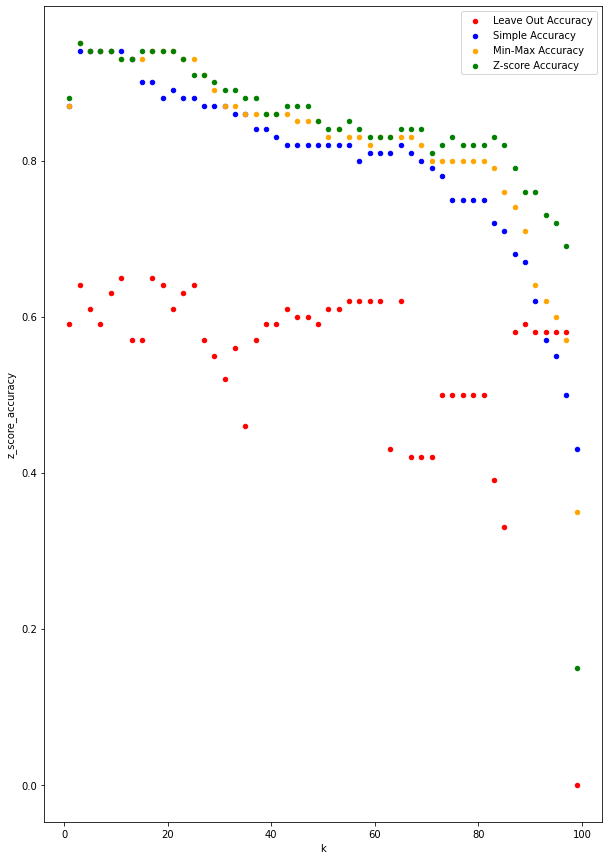

In [21]:
k_values = range(1,100,2)

all_accuracy_df = pd.DataFrame({'k': k_values, 'leave_out_accuracy': leave_out_accuracy, 'simple_accuracy': simple_accuracy, 'min_max_accuracy': min_max_accuracy, 'z_score_accuracy': z_score_accuracy})
leave_out_plot = all_accuracy_df.plot(x='k', y='leave_out_accuracy', label='Leave Out Accuracy', kind='scatter', color='red')
simple_plot = all_accuracy_df.plot(x='k', y='simple_accuracy', label='Simple Accuracy', ax=leave_out_plot, kind='scatter', color='blue')
min_max_plot = all_accuracy_df.plot(x='k', y='min_max_accuracy', label='Min-Max Accuracy', ax=simple_plot, kind='scatter', color='orange')
all_accuracy_df.plot(x='k', y='z_score_accuracy', label='Z-score Accuracy', ax= min_max_plot, kind='scatter', color='green', figsize=(10,15))